<a href="https://colab.research.google.com/github/karanrp813/health-trend-spotter/blob/main/Dinosaur_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 \
diffusers transformers accelerate safetensors huggingface_hub --upgrade --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving world_coordinates.csv to world_coordinates (1).csv


In [ ]:
!pip install pandas seaborn matplotlib plotly folium

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from IPython.display import display
from ipywidgets import interact

In [ ]:
# Load dinosaur data (already uploaded earlier)
df = pd.read_csv("data.csv")
df["lived_in"] = df["lived_in"].str.strip()

# Load country coordinates
coords_df = pd.read_csv("world_coordinates.csv")
coords_df.columns = coords_df.columns.str.strip()
coords_df["Country"] = coords_df["Country"].str.strip()
coords_df.head()


,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [ ]:
df = pd.read_csv("data.csv")
df.columns


Index(['name', 'diet', 'period', 'lived_in', 'type', 'length', 'taxonomy',
       'named_by', 'species', 'link'],
      dtype='object')

In [ ]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.head()


,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link


In [ ]:
df = df.rename(columns={
    "lived_in": "country",
})


In [ ]:
df.head()


,name,diet,period,country,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...


In [ ]:
df = pd.read_csv("world_coordinates.csv")
df.columns

Index(['Code', 'Country', 'latitude', 'longitude'], dtype='object')

In [ ]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.head()


,code,country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [ ]:
df = df.rename(columns={
    "Country": "country",
})


In [ ]:
df.head()


,code,country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [ ]:
# Load dinosaur data again to ensure 'df' contains the correct dataframe
df_dino = pd.read_csv("data.csv")
df_dino["lived_in"] = df_dino["lived_in"].str.strip()

# Ensure coords_df is also loaded correctly
coords_df = pd.read_csv("world_coordinates.csv")
coords_df.columns = coords_df.columns.str.strip()
coords_df["Country"] = coords_df["Country"].str.strip()


df_map = pd.merge(df_dino, coords_df, left_on="lived_in", right_on="Country", how="left")
df_map = df_map.dropna(subset=["latitude", "longitude"])
display(df_map.head())

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,Code,Country,latitude,longitude
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,ZA,South Africa,-30.559482,22.937506
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,AR,Argentina,-38.416097,-63.616672
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,MN,Mongolia,46.862496,103.846656
5,aegyptosaurus,herbivorous,Late Cretaceous 98-93 million years ago,Egypt,sauropod,15.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Stromer (1932),baharijensis,https://www.nhm.ac.uk/discover/dino-directory/...,EG,Egypt,26.820553,30.802498
6,afrovenator,carnivorous,Early Cretaceous 132-121 million years ago,Niger,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Sereno Wilson Larsson Dutheil and Sues (1944),abakensis,https://www.nhm.ac.uk/discover/dino-directory/...,NE,Niger,17.607789,8.081666


In [ ]:
df_map = df_map.drop(columns=["Country"])

In [ ]:
# Load dinosaur data again to ensure 'df' contains the correct dataframe
df_dino = pd.read_csv("data.csv")
df_dino["lived_in"] = df_dino["lived_in"].str.strip()

# Ensure coords_df is also loaded correctly
coords_df = pd.read_csv("world_coordinates.csv")
coords_df.columns = coords_df.columns.str.strip()
coords_df["Country"] = coords_df["Country"].str.strip()


df_map = pd.merge(df_dino, coords_df, left_on="lived_in", right_on="Country", how="left")
df_map = df_map.dropna(subset=["latitude", "longitude"])
import folium
from folium.plugins import MarkerCluster

# Create base map
dino_map = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(dino_map)

# Add each dinosaur as a marker
for _, row in df_map.iterrows():
    popup = f"<b>{row['name']}</b><br>period: {row.get('period', 'Unknown')}<br>Discovered in: {row['lived_in']}"
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=popup,
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(marker_cluster)

dino_map


In [ ]:
# Example: Filter all herbivores
df[df['diet'].str.lower() == 'herbivorous']


,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
5,aegyptosaurus,herbivorous,Late Cretaceous 98-93 million years ago,Egypt,sauropod,15.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Stromer (1932),baharijensis,https://www.nhm.ac.uk/discover/dino-directory/...
7,agilisaurus,herbivorous,Late Jurassic 169-159 million years ago,China,euornithopod,1.5m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Peng (1990),louderbacki,https://www.nhm.ac.uk/discover/dino-directory/...
8,alamosaurus,herbivorous,Late Cretaceous 70-65 million years ago,USA,sauropod,21.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Gilmore (1922),sanjuanensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...
307,zephyrosaurus,herbivorous,Early Cretaceous 120-110 million years ago,USA,euornithopod,1.8m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Sues (1980),schaffi,https://www.nhm.ac.uk/discover/dino-directory/...


In [ ]:
print("Available columns:", df.columns.tolist())
print("\nSummary stats:")
print(df.describe(include='all'))

Available columns: ['name', 'diet', 'period', 'lived_in', 'type', 'length', 'taxonomy', 'named_by', 'species', 'link']

Summary stats:
       name diet period lived_in type  length taxonomy named_by species link
count     0    0      0        0    0     0.0        0        0       0    0
unique    0    0      0        0    0     NaN        0        0       0    0
top     NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
freq    NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
mean    NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
std     NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
min     NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
25%     NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
50%     NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
75%     NaN  NaN    NaN      NaN  NaN     NaN      NaN      NaN     NaN  NaN
max     NaN  NaN  

In [ ]:
def search_dino(name):
    result = df[df['name'].str.contains(name, case=False)]
    display(result)

search_dino("Raptor")

@interact(Diet=df['diet'].dropna().unique())
def show_by_diet(Diet='carnivorous'):
    display(df[df['diet'] == Diet])

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
39,bambiraptor,carnivorous,Late Cretaceous 84-71 million years ago,USA,small theropod,1.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Burnham Derstler Currie Bakker Zhou and Ostrom...,feinbergorum,https://www.nhm.ac.uk/discover/dino-directory/...
50,buitreraptor,carnivorous,Late Cretaceous 99-90 million years ago,Argentina,small theropod,1.3m,Dinosauria Saurischia Theropoda Neotheropoda T...,Makovicky Apesteguía &amp; Agnolin (2005),gonzalezorum,https://www.nhm.ac.uk/discover/dino-directory/...
73,conchoraptor,carnivorous,Late Cretaceous 81-76 million years ago,Mongolia,small theropod,1.5m,Dinosauria Saurischia Theropoda Neotheropoda T...,Barsbold (1986),gracilis,https://www.nhm.ac.uk/discover/dino-directory/...
97,eoraptor,carnivorous,Late Triassic 228 million years ago,Argentina,small theropod,1.0m,Dinosauria Saurischia Theropoda,Sereno Forster Rogers and Monetta (1993),lunensis,https://www.nhm.ac.uk/discover/dino-directory/...
106,fukuiraptor,carnivorous,Early Cretaceous 121-99 million years ago,Japan,large theropod,4.2m,Dinosauria Saurischia Theropoda Neotheropoda T...,Azuma and Currie (2000),kitadaniensis,https://www.nhm.ac.uk/discover/dino-directory/...
179,microraptor,carnivorous,Early Cretaceous 125-122 million years ago,China,small theropod,0.8m,Dinosauria Saurischia Theropoda Neotheropoda T...,Xu Zhou and Wang (2000),zhaoianus,https://www.nhm.ac.uk/discover/dino-directory/...
205,oviraptor,omnivorous,Late Cretaceous 85-75 million years ago,Mongolia,small theropod,2.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Osborn (1924),philoceratops,https://www.nhm.ac.uk/discover/dino-directory/...
262,sinraptor,carnivorous,Mid Jurassic 169-142 million years ago,China,large theropod,7.6m,Dinosauria Saurischia Theropoda Neotheropoda T...,Gao (1992),hepingensis,https://www.nhm.ac.uk/discover/dino-directory/...
295,utahraptor,carnivorous,Early Cretaceous 112-100 million years ago,USA,large theropod,6.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Kirkland Gaston and Burge (1993),ostrommaysorum,https://www.nhm.ac.uk/discover/dino-directory/...
297,velociraptor,carnivorous,Late Cretaceous 74-70 million years ago,Mongolia,small theropod,1.8m,Dinosauria Saurischia Theropoda Neotheropoda T...,Osborn (1924),mongoliensis,https://www.nhm.ac.uk/discover/dino-directory/...


interactive(children=(Dropdown(description='Diet', index=1, options=('herbivorous', 'carnivorous', 'omnivorous…

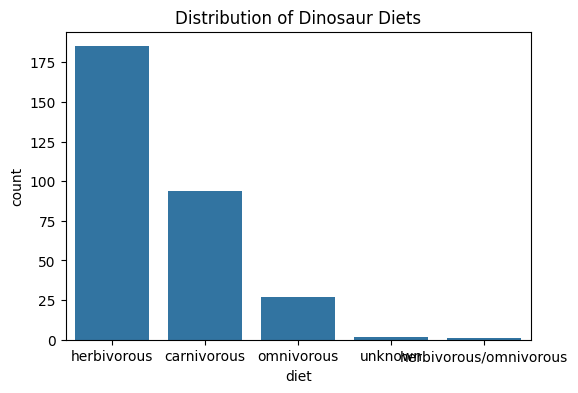

In [ ]:
# Diet distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diet')
plt.title("Distribution of Dinosaur Diets")
plt.show()

# Period by Diet
fig = px.histogram(df, x='period', color='diet', title="Dinosaur Period Timeline by Diet")
fig.show()



In [ ]:
# --- PHASE 6: Map Visualization (simplified) ---
# Fake coordinates centered on continents for now
continent_coords = {
    'Argentina': [-34.6, -58.4], # Adding specific locations as examples
    'USA': [37.1, -95.7],
    'Mongolia': [46.8, 103.8],
    'Egypt': [26.8, 30.8],
    'China': [35.9, 105.2],
    'Romania': [45.9, 24.9],
    'South Africa': [-30.6, 22.9],
    'Japan': [36.2, 138.3],
}

m = folium.Map(location=[0, 0], zoom_start=2)

for _, row in df.iterrows():
    # Use the 'lived_in' column for location
    location = row['lived_in']
    if pd.notna(location) and location in continent_coords:
        lat, lon = continent_coords[location]
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            popup=f"{row['name']} ({location})", # Update popup to use 'lived_in'
            color='blue',
            fill=True
        ).add_to(m)

m